In [40]:
#Kaveesh Tata    21BBS0244
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats

In [41]:
#Kaveesh Tata    21BBS0244
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\penguins_size.csv")

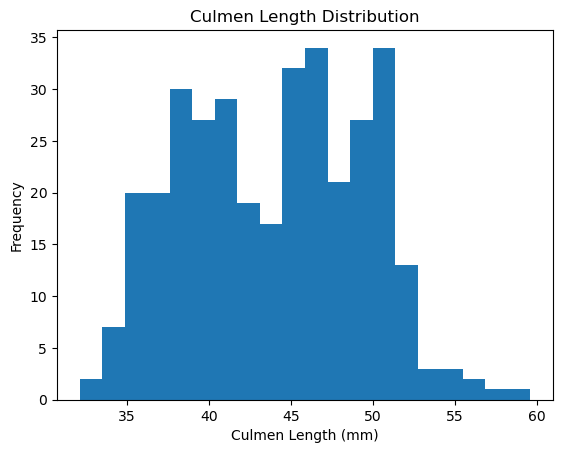

In [42]:
#Kaveesh Tata    21BBS0244
plt.hist(df['culmen_length_mm'], bins=20)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.title('Culmen Length Distribution')
plt.show()

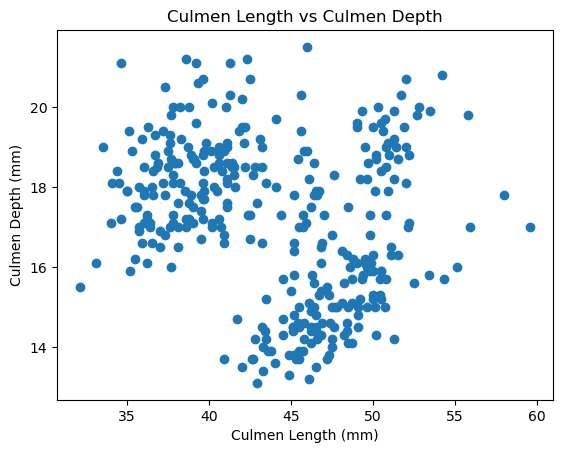

In [43]:
#Kaveesh Tata    21BBS0244
plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs Culmen Depth')
plt.show()

In [45]:
#Kaveesh Tata    21BBS0244
z_scores = np.abs(stats.zscore(df['culmen_length_mm']))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

In [47]:
#Kaveesh Tata    21BBS0244
mean_without_outliers = np.mean(df['culmen_length_mm'][~np.isin(np.arange(len(df)), outlier_indices)])
df.loc[outlier_indices, 'culmen_length_mm'] = mean_without_outliers

C:\Users\DELL\AppData\Local\Temp\ipykernel_24740\2050139475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


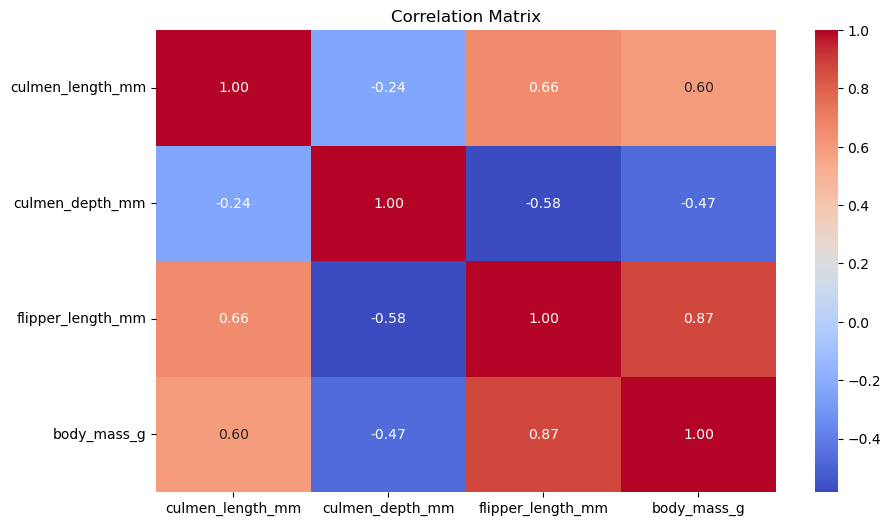

In [8]:
#Kaveesh Tata    21BBS0244
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
#Kaveesh Tata    21BBS0244
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [10]:
#Kaveesh Tata    21BBS0244
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [18]:
#Kaveesh Tata    21BBS0244
correlation_matrix = df.corr(numeric_only=True)


In [20]:
#Kaveesh Tata    21BBS0244
correlation_with_target = correlation_matrix.iloc[:-1, -1].sort_values(ascending=False)
print(correlation_with_target)

flipper_length_mm    0.871202
culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
Name: body_mass_g, dtype: float64


In [28]:
#Kaveesh Tata    21BBS0244
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.head())

   flipper_length_mm  body_mass_g  island_Dream  island_Torgersen  sex_FEMALE  \
0              181.0       3750.0             0                 1           0   
1              186.0       3800.0             0                 1           1   
2              195.0       3250.0             0                 1           1   
3                NaN          NaN             0                 1           0   
4              193.0       3450.0             0                 1           1   

   sex_MALE  culmen_length_mm_33.1  culmen_length_mm_33.5  \
0         1                      0                      0   
1         0                      0                      0   
2         0                      0                      0   
3         0                      0                      0   
4         0                      0                      0   

   culmen_length_mm_34.0  culmen_length_mm_34.1  ...  culmen_depth_mm_20.3  \
0                      0                      0  ...                

In [31]:
#Kaveesh Tata    21BBS0244
X = df.drop('species', axis=1)
y = df['species']

In [33]:
#Kaveesh Tata    21BBS0244
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
#Kaveesh Tata    21BBS0244
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
#Kaveesh Tata    21BBS0244
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (275, 248) (275,)
Testing data shape: (69, 248) (69,)
